![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)

# Benchmarks for EGFR & mutants

## Background
**EGFR (Epidermal Growth Factor Receptor) kinase** is a type of receptor tyrosine kinase that plays a significant role in cell growth, proliferation, and survival. Mutations or overexpression of EGFR have been associated with various diseases, particularly cancer.

## Benchmarking
 **EGFR Wild type**:  Targeting wild-type EGFR with small-molecule inhibitors, such as erlotinib, is an ongoing area of research in the treatment of glioblastoma. While early findings are promising, the complexity of glioblastoma biology presents challenges that require further investigation to improve treatment outcomes for patients.

 **EGFR L858R:** While EGFR TKIs initially demonstrate impressive responses in NSCLC patients with the L858R mutation, resistance to these drugs can develop over time. However, newer generations of EGFR TKIs, like osimertinib, have been developed to target these resistant mutations.

**The goal** of this benchmark is to select the best predictive model for 
- Optimization of the bioactivity % inhibition.
- Discovery of potential hits in new chemical space.

## Description of readout 
- **Readouts**: `EGFR_(L858R_mutant)`, `EGFR`
- **Bioassay readout**: Percentage of inhnibition.
- **Optimization objective**: Higher the more potent.

## Data resource: 
- **Reference**: [PKIS1](https://pubmed.ncbi.nlm.nih.gov/26501955)


## Train/test split
Given the benchmarking goal, a scaffold-based splitting approach was applied to ensure training and test sets contain distinct chemical structures while maintaining the diversity of scaffolds.


In [1]:
import pandas as pd
import datamol as dm
import numpy as np
from sklearn.model_selection import ShuffleSplit
import polaris
from polaris.curation._chemistry_curator import SMILES_COL, UNIQUE_ID
from polaris.dataset import Dataset, ColumnAnnotation
from polaris.benchmark import (
    SingleTaskBenchmarkSpecification,
    MultiTaskBenchmarkSpecification,
)

import os
import pathlib

os.chdir(pathlib.Path("__file__").absolute().parents[2])
from utils import *

In [2]:
BENCHMARK_DIR = "gs://polaris-public/benchmarks/kinases/egfr"
FIGURE_DIR = "gs://polaris-public/datasets/kinases/egfr/figures"

### Load existing data
> **Attention:** \
> The original dataset is published in https://pubmed.ncbi.nlm.nih.gov/26501955 \
> 
> To **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.
> Therefore, the raw data from the data resource is not used here. 
> See more curation details in [01_EGFR_mutants_data_curation.ipynb](https://github.com/polaris-hub/polaris-recipes/blob/mvp/03_Kinases/EGFR/mutants/01_EGFR_mutants_data_curation.ipynb)


In [15]:
# Load data
dataset = polaris.load_dataset(
    'gs://polaris-public/datasets/kinases/pkis1_subset_curated/kinase-pkis1-1/dataset.json'
)

In [16]:
dataset

{
  "name": "kinase-pkis1-1",
  "description": "A subset of PKIS dataset only including EGFR, RET, KIT kinases. PKIS is a data set of 367 small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.",
  "tags": [
    "kinase",
    "hit-discovery",
    "selectivity"
  ],
  "user_attributes": {},
  "owner": "polaristest",
  "md5sum": "e5ce4564979dd3dec26bcb43b35cf2aa",
  "readme": "![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-fox-60-kinases.png)\n\n## Backgroud:\n Kinases play a crucial role in cellular signalling, making them important targets for drug development. Dysregulation of kinases is frequently implicated in diseases like cancer, inflammation, and neurodegenerative disorders. Therefore, targeting kinases with specific drugs has emerged as a crucial strategy in modern drug discovery. Kinase-related task includes inhibition prediction, selectivity prediction, or kinase-ligand binding affinity prediction. In the early release version of Polaris, benchmarks were established for kinases such as EGFR, KIT, and RET, along with their respective mutations, as well as for LOK and SLK.\n\n\n## Description of readout \n- **Readouts**:\n    - `EGFR`, `EGFR_(L858R_mutant)`, `EGFR_(L861Q_mutant)`, `EGFR_(T790M_mutant)`, `EGFR_(T790M-L858R_mutant)`\n    - `KIT`, `KIT_(D816V_mutant)`, `KIT_(T6701_mutant)`, `KIT_(V560G_mutant)`\n    - `RET`, `RET_(V804L_mutant)`, `RET_(Y791F_mutant)`\n    - `LOK`\n- **Bioassay readout**: Percentage of inhibition (%).\n- **Optimization objective**: Higher potency (higher %inhibition).\n\n\n## Data resource:\nPKIS 1: A set of 364 unique small-molecule ATP-competitive kinase inhibitors that was screened by the set in activity assays with 224 recombinant kinases and 24 G protein-coupled receptors and in cellular assays of cancer cell proliferation and angiogenesis.\n\n**Reference**: https://pubmed.ncbi.nlm.nih.gov/26501955\n\n## Data curation\nTo **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.\n\nThe full curation and creation process is documented [here](https://github.com/polaris-hub/polaris-recipes/tree/main/03_Kinases/PKIS1).\n\n<!-- ## Related benchmarks -->",
  "annotations": {
    "UNIQUE_ID": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Molecular hash ID. See <datamol.mol.hash_mol>",
      "user_attributes": {},
      "dtype": "object"
    },
    "smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": "Molecule SMILES string",
      "user_attributes": {},
      "dtype": "object"
    },
    "EGFR_(L858R_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on EGFR with mutation L858R_mutant",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      },
      "dtype": "float64"
    },
    "EGFR": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on EGFR with mutation L858R_mutant",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "objective": "Higher value",
        "source": "PKIS1",
        "mutation": "L858R_mutant",
        "target": "EGFR"
      },
      "dtype": "float64"
    },
    "KIT_(T6701_mutant)": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Percentage of inhibition on KIT with mutation L858R_mutant",
      "user_attributes": {
        "unit": "%",
        "concentration": "1uM",
        "organism": "Human",
        "obj

In [17]:
data_cols = ["EGFR_(L858R_mutant)", "EGFR"]

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-validation-test set and defining evaluation metrics which is used to establish baseline performance level. 

In [18]:
from polaris.utils.types import HubOwner

owner = HubOwner(organizationId="PolarisTest", slug="polaristest")
owner

HubOwner(slug='polaristest', external_id=None, type=None)

### Create scaffold split for `EGFR & mutants` dataset
> **Note:**
> Here we use splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

In [19]:
# scaffold split
from partitio._scaffold_split import ScaffoldSplit

flag = True
nums_pos_test = []
TEST_SIZE = 0.2
SEED = 846
splitter = ScaffoldSplit(
    smiles=dataset.table.smiles.values,
    n_jobs=-1,
    test_size=TEST_SIZE,
    random_state=SEED,
)
scaffold_split = next(splitter.split(X=dataset.table.smiles.values))

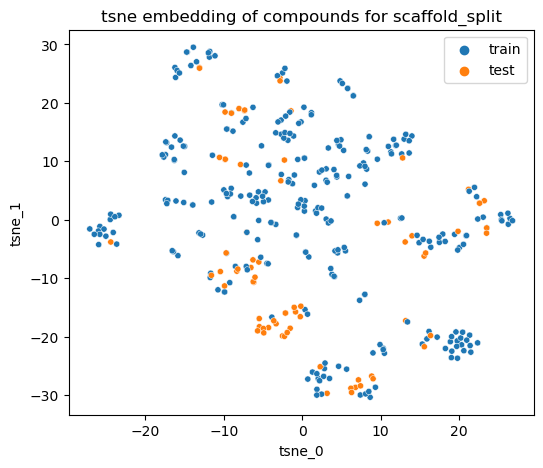

In [20]:
from utils import display_chemspace

data_name = "egfr_wt_l858r_v1"
fig = display_chemspace(
    dataset.table.copy(), "smiles", split=scaffold_split, split_name="scaffold_split"
)
method = "tnse"
save_figure(
    fig,
    remote_path=f"{FIGURE_DIR}/{data_name}_{method}_scaffold_split.png",
    local_path=f"figures/{data_name}_{method}_scaffold_split.png",
)

## Define multitask benchmarks for EGFR and L858R mutant with scaffold split

**Regression tasks**

In [22]:
benchmark_name = "pkis1-egfr-wt-mut-r-1"
readme_name = "drewry_egfr_wt_l858r_multitask_reg_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
data_cols = ["EGFR", "EGFR_(L858R_mutant)"]

benchmark_reg = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["kinase", "hit-discovery", "selectivity"],
    description="A multitask regression benchmark for kinase EGFR wild type and L858R mutant.",
    owner=owner,
    readme=load_readme(
        f"gs://polaris-public/readme/benchmarks/{readme_name}_readme.md"
    ),
)
path = benchmark_reg.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/egfr/pkis1-egfr-wt-mut-r-1/benchmark.json


**Classification task**

In [24]:
data_cols = ["CLASS_EGFR", "CLASS_EGFR_(L858R_mutant)"]
benchmark_name = "pkis1-egfr-wt-mut-c-1"
readme_name = "drewry_egfr_wt_l858r_multitask_clf_v1"
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"

benchmark_clf = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    input_cols="smiles",
    split=scaffold_split,
    main_metric="pr_auc",
    metrics=["accuracy", "f1", "roc_auc", "pr_auc", "mcc", "cohen_kappa"],
    tags=["kinase", "hit-discovery", "selectivity"],
    description="A multitask classification benchmark for kinase EGFR wild type and L858R mutant.",
    owner=owner,
    readme=load_readme(
        f"gs://polaris-public/readme/benchmarks/{readme_name}_readme.md"
    ),
)
path = benchmark_clf.to_json(BENCHMARK_SAVE_DIR)
print(path)

gs://polaris-public/benchmarks/kinases/egfr/pkis1-egfr-wt-mut-c-1/benchmark.json
